# Flock Simulation

#### System Specs

* Ubuntu 22.04.3 LTS
* Linux 5.15.0-92-generic x86_64
* AMD Ryzen 7 PRO 5850U, 8c 16t
* 16 GB Ram
* 512GB SSD

Generate a parameter grid that we can use for our executions

In [3]:
import itertools

# Define simulation parameters
v0 = 1.0          # velocity
eta = 0.5         # random fluctuation in angle (in radians)
R = 1             # interaction radius
dt = 0.2          # time step
L = 10            # size of box
Nt = [30, 60, 120, 240]  # number of time steps
N = [100, 200, 400, 800]  # number of birds

# Generate all possible combinations of simulation parameters and assign names
SIM_PARAMETERS = {}
for Nt_val, N_val in itertools.product(Nt, N):
    name = f"Nt_{Nt_val}_N_{N_val}"
    SIM_PARAMETERS[name] = (v0, eta, L, R, dt, Nt_val, N_val)

TIMES = {}

In [4]:
SIM_PARAMETERS

{'Nt_30_N_100': (1.0, 0.5, 10, 1, 0.2, 30, 100),
 'Nt_30_N_200': (1.0, 0.5, 10, 1, 0.2, 30, 200),
 'Nt_30_N_400': (1.0, 0.5, 10, 1, 0.2, 30, 400),
 'Nt_30_N_800': (1.0, 0.5, 10, 1, 0.2, 30, 800),
 'Nt_60_N_100': (1.0, 0.5, 10, 1, 0.2, 60, 100),
 'Nt_60_N_200': (1.0, 0.5, 10, 1, 0.2, 60, 200),
 'Nt_60_N_400': (1.0, 0.5, 10, 1, 0.2, 60, 400),
 'Nt_60_N_800': (1.0, 0.5, 10, 1, 0.2, 60, 800),
 'Nt_120_N_100': (1.0, 0.5, 10, 1, 0.2, 120, 100),
 'Nt_120_N_200': (1.0, 0.5, 10, 1, 0.2, 120, 200),
 'Nt_120_N_400': (1.0, 0.5, 10, 1, 0.2, 120, 400),
 'Nt_120_N_800': (1.0, 0.5, 10, 1, 0.2, 120, 800),
 'Nt_240_N_100': (1.0, 0.5, 10, 1, 0.2, 240, 100),
 'Nt_240_N_200': (1.0, 0.5, 10, 1, 0.2, 240, 200),
 'Nt_240_N_400': (1.0, 0.5, 10, 1, 0.2, 240, 400),
 'Nt_240_N_800': (1.0, 0.5, 10, 1, 0.2, 240, 800)}

Create a helper function to run our benchmark.

The code is executed N_SIM times, and averaged between them.

Both mean and standard deviation are stored.

In [5]:
%matplotlib agg

# Reload flock_simulation
from time import time_ns
import flock_simulation
import importlib
importlib.reload(flock_simulation)
import numpy as np

def measure_simulation(name, simulation_fn, sim_parameters, N_SIM=10, animate=False, desc=""):

    step_times_per_run = []  # Store average step times for each step
    total_times_per_run = []  # Store total times for each simulation

    for _ in range(N_SIM):
        # Simulate
        t_start = time_ns()
        positions, velocities, step_times = simulation_fn(sim_parameters)
        total_time = time_ns() - t_start

        if animate:
            flock_simulation.animate(name, sim_parameters, positions, velocities)

        total_times_per_run.append(total_time)
        step_times_per_run.append(step_times)

    # Calculate average step times and standard deviation across all runs
    avg_step_times = np.mean(np.array(step_times_per_run), axis=0) / 1e9  # Convert to seconds
    std_step_times = np.std(np.array(step_times_per_run), axis=0) / 1e9  # Convert to seconds

    # Calculate average total time and standard deviation across all runs
    avg_total_time = np.mean(total_times_per_run) / 1e9  # Convert to seconds
    std_dev_total_time = np.std(total_times_per_run) / 1e9  # Convert to seconds

    TIMES[name] = {
        'desc': desc,
        'avg_step_times': avg_step_times,
        'std_step_times': std_step_times,
        'avg_total_time': avg_total_time,
        'std_dev_total_time': std_dev_total_time
    }


# Run Cython

Run the C-compiled version of the simulation code. 

In [6]:
%matplotlib agg

import flock_simulation_C
import importlib
importlib.reload(flock_simulation_C)

NAME="cython"
DESC="Simulation using a Cython-compiled mean theta function"
SIMULATION=flock_simulation_C.simulate

# Iterate over each combination of simulation parameters
for name, parameters in SIM_PARAMETERS.items():
    print(name)
    measure_simulation(
        f"{NAME}_{name}",
        SIMULATION,
        parameters,
        desc=DESC
    )

Nt_30_N_100
Nt_30_N_200
Nt_30_N_400
Nt_30_N_800
Nt_60_N_100
Nt_60_N_200
Nt_60_N_400
Nt_60_N_800
Nt_120_N_100
Nt_120_N_200
Nt_120_N_400
Nt_120_N_800
Nt_240_N_100
Nt_240_N_200
Nt_240_N_400
Nt_240_N_800


## Run basic

Run the refactored version of the simulation - this version includes minimal modifications that should not affect performance greatly

In [7]:
%matplotlib agg

import flock_simulation
import importlib
importlib.reload(flock_simulation)

NAME="basic"
DESC="Basic Simulation"
SIMULATION=flock_simulation.simulate

# Iterate over each combination of simulation parameters
for name, parameters in SIM_PARAMETERS.items():
    print(name)
    measure_simulation(
        f"{NAME}_{name}",
        SIMULATION,
        parameters,
        desc=DESC
    )

Nt_30_N_100
Nt_30_N_200
Nt_30_N_400
Nt_30_N_800
Nt_60_N_100
Nt_60_N_200
Nt_60_N_400
Nt_60_N_800
Nt_120_N_100
Nt_120_N_200
Nt_120_N_400
Nt_120_N_800
Nt_240_N_100
Nt_240_N_200
Nt_240_N_400
Nt_240_N_800


## Run Original

Run the original simulation code, with minimal modifications to adapt it's interface.

This simulation servers as a baseline

In [8]:
%matplotlib agg

import flock_simulation_original
import importlib
importlib.reload(flock_simulation_original)

NAME="original"
DESC="Simulation using the original code"
SIMULATION=flock_simulation_original.simulate

# Iterate over each combination of simulation parameters
for name, parameters in SIM_PARAMETERS.items():
    print(name)
    measure_simulation(
        f"{NAME}_{name}",
        SIMULATION,
        parameters,
        desc=DESC
    )

Nt_30_N_100
Nt_30_N_200
Nt_30_N_400
Nt_30_N_800
Nt_60_N_100
Nt_60_N_200
Nt_60_N_400
Nt_60_N_800
Nt_120_N_100
Nt_120_N_200
Nt_120_N_400
Nt_120_N_800
Nt_240_N_100
Nt_240_N_200
Nt_240_N_400
Nt_240_N_800


## Run Parallel Threads

Run the parallelized version of the simulation using ThreadPoolExecutor

In [9]:
%matplotlib agg

import flock_simulation_parallel
import importlib
importlib.reload(flock_simulation_parallel)

NAME="parallel-threadpool"
DESC="Simulation using a parallelized step function with threads"
SIMULATION=flock_simulation_parallel.simulate

# Iterate over each combination of simulation parameters
for name, parameters in SIM_PARAMETERS.items():
    print(name)
    measure_simulation(
        f"{NAME}_{name}",
        SIMULATION,
        parameters,
        desc=DESC
    )

Nt_30_N_100
Nt_30_N_200
Nt_30_N_400
Nt_30_N_800
Nt_60_N_100
Nt_60_N_200
Nt_60_N_400
Nt_60_N_800
Nt_120_N_100
Nt_120_N_200
Nt_120_N_400
Nt_120_N_800
Nt_240_N_100
Nt_240_N_200
Nt_240_N_400
Nt_240_N_800


In [10]:
TIMES

{'cython_Nt_30_N_100': {'desc': 'Simulation using a Cython-compiled mean theta function',
  'avg_step_times': array([9.875530e-05, 1.027715e-04, 9.984500e-05, 1.011301e-04,
         1.060191e-04, 9.784750e-05, 9.822480e-05, 1.004038e-04,
         1.032534e-04, 1.078491e-04, 1.055998e-04, 1.176618e-04,
         1.168375e-04, 1.033302e-04, 1.073808e-04, 1.071716e-04,
         1.098465e-04, 1.100559e-04, 1.082258e-04, 1.132406e-04,
         1.157967e-04, 1.155943e-04, 1.145607e-04, 1.140505e-04,
         1.122908e-04, 1.063055e-04, 1.094972e-04, 1.083098e-04,
         1.140506e-04, 1.106564e-04]),
  'std_step_times': array([3.83427309e-05, 3.83684143e-05, 3.39921802e-05, 3.56655387e-05,
         2.51403477e-05, 2.91909148e-05, 2.95496000e-05, 3.04461070e-05,
         2.80746803e-05, 3.00022126e-05, 2.92625023e-05, 4.89365378e-05,
         3.47787830e-05, 3.26720990e-05, 3.92584938e-05, 3.53710432e-05,
         3.26615201e-05, 3.29884900e-05, 3.32348934e-05, 3.17494803e-05,
         3.1232

## Line Profiler (disabled)

Run Line Profiler on the basic simulation

## CProfile (disabled)

Run CProfile on the basic simulation

## Graph the results

Setup helper code to graph the results

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(TIMES).transpose()

# Save TIMES to a CSV file
df.to_csv("TIMES.data")

plt.close()

import matplotlib.pyplot as plt
# to change default colormap
plt.rcParams["image.cmap"] = "Dark2"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

 # Compare N Birds


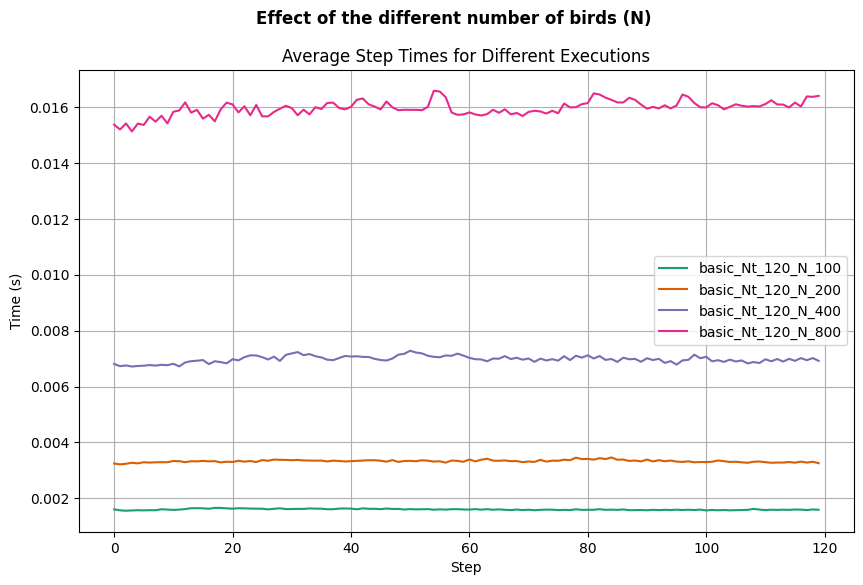

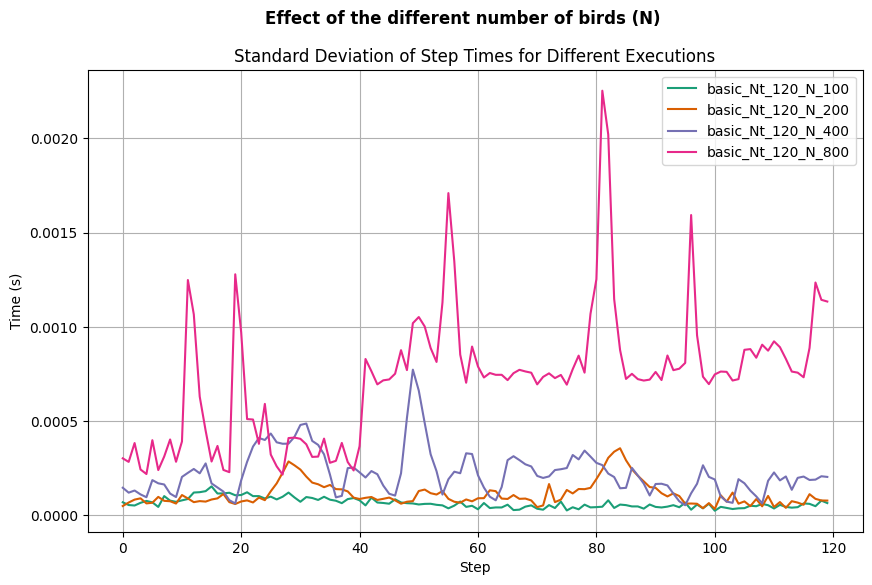

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

# Filter the DataFrame to include only the desired combinations
df_filtered = df[df.index.str.startswith('basic_') & df.index.str.contains('Nt_120')]
extra_title = "Effect of the different number of birds (N)"

def plot_avg_step_times_per_execution(df, extra_title=""):
    # Plot average step times for each execution
    plt.figure(figsize=(10, 6))
    for idx, (name, row) in enumerate(df.iterrows(), start=1):
        plt.plot(row['avg_step_times'], label=name)

    plt.xlabel('Step')
    plt.ylabel('Time (s)')
    plt.title(f'Average Step Times for Different Executions')
    plt.suptitle(extra_title, weight = "bold")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_avg_step_times_per_execution(df_filtered, extra_title)
    
def plot_std_step_times_per_execution(df, extra_title=""):
    # Plot standard deviation of step times for each execution
    plt.figure(figsize=(10, 6))
    for idx, (name, row) in enumerate(df.iterrows(), start=1):
        plt.plot(row['std_step_times'], label=name)

    plt.xlabel('Step')
    plt.ylabel('Time (s)')
    plt.title(f'Standard Deviation of Step Times for Different Executions')
    plt.suptitle(extra_title, weight = "bold")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_std_step_times_per_execution(df_filtered, extra_title)

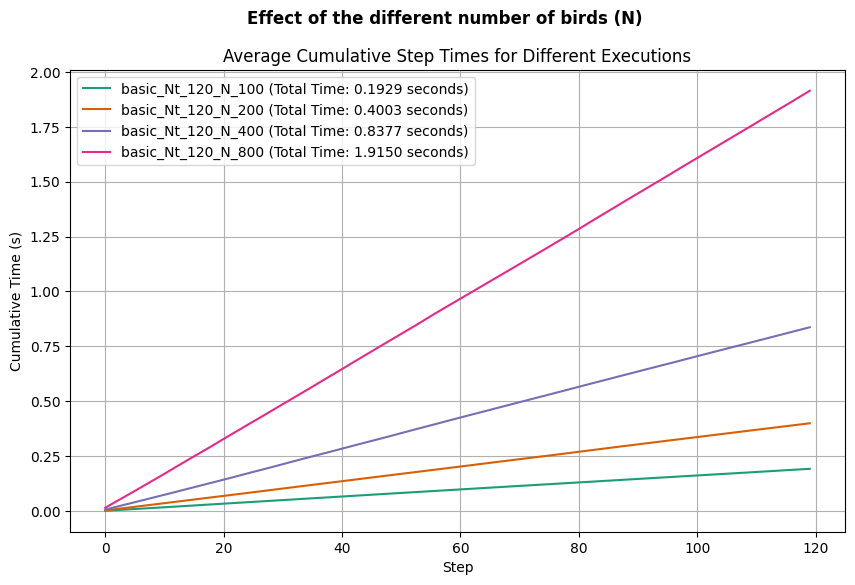

In [13]:
import matplotlib.pyplot as plt

def plot_avg_cumulative_step_times_per_execution(df, extra_title=""):
    # Plot cumulative step times for each execution
    plt.figure(figsize=(10, 6))
    for idx, (name, data) in enumerate(df.iterrows(), start=1):
        plt.plot(np.cumsum(data['avg_step_times']), label=f"{name} (Total Time: {data['avg_total_time']:.4f} seconds)")

    plt.xlabel('Step')
    plt.ylabel('Cumulative Time (s)')
    plt.title(f'Average Cumulative Step Times for Different Executions')
    plt.suptitle(extra_title, weight = "bold")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_avg_cumulative_step_times_per_execution(df_filtered, extra_title)

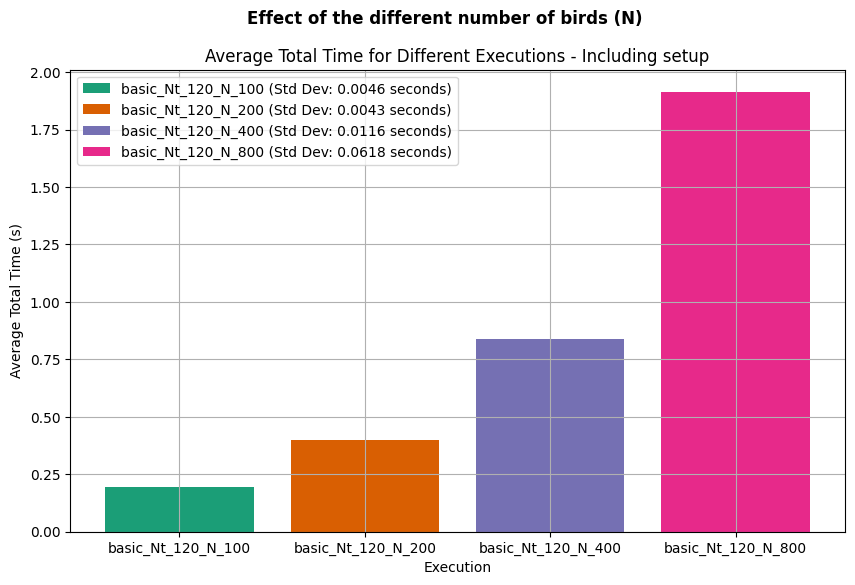

In [14]:
import matplotlib.pyplot as plt

def plot_avg_total_time_per_executions(df, extra_title=""):

    # Plot average total time for each execution
    plt.figure(figsize=(10, 6))
    for idx, (name, row) in enumerate(df.iterrows(), start=1):
        plt.bar(name, row['avg_total_time'], label=f"{name} (Std Dev: {row['std_dev_total_time']:.4f} seconds)")

    plt.xlabel('Execution')
    plt.ylabel('Average Total Time (s)')
    plt.title(f'Average Total Time for Different Executions - Including setup' )
    plt.suptitle(extra_title, weight = "bold")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_avg_total_time_per_executions(df_filtered,  extra_title)

# Compare Nt Steps

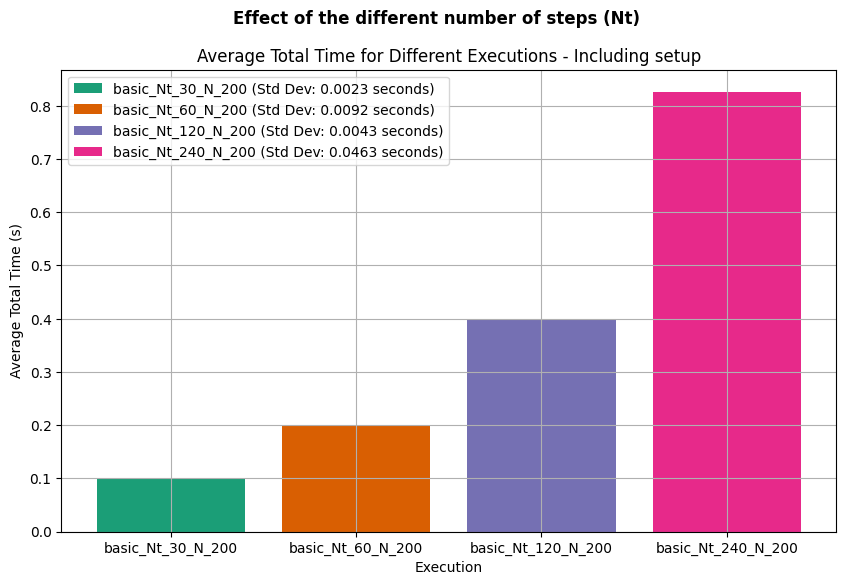

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

# Filter the DataFrame to include only the desired combinations
df_filtered = df[df.index.str.startswith('basic_') & df.index.str.contains('N_200')]
extra_title = "Effect of the different number of steps (Nt)"

plot_avg_total_time_per_executions(df_filtered,  extra_title)

 # Compare bare, line-profile, cprofile (disabled)
 
 Compare the performance between the basic simulation, and the simulations ran with profiling tools


## Compare all simulations for Nt_120_N_800

Use an example set of parameters to compare all 4 simulations

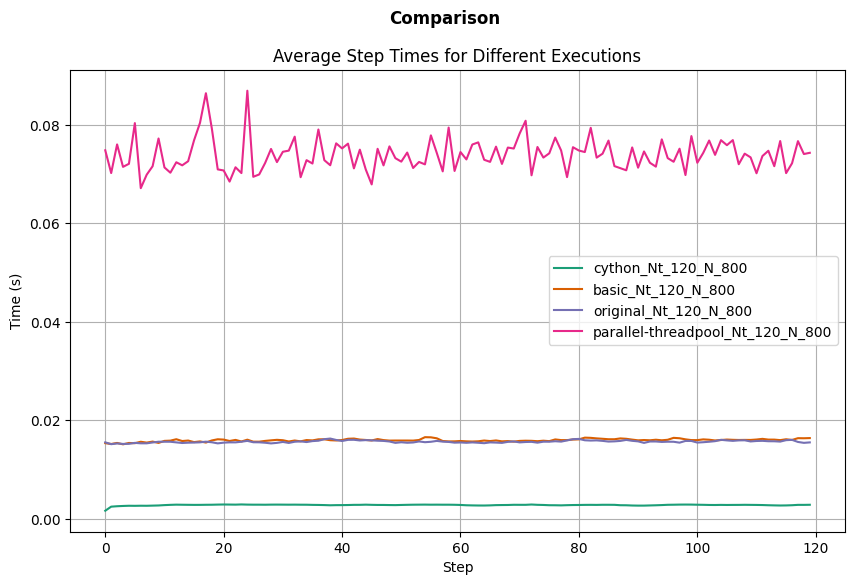

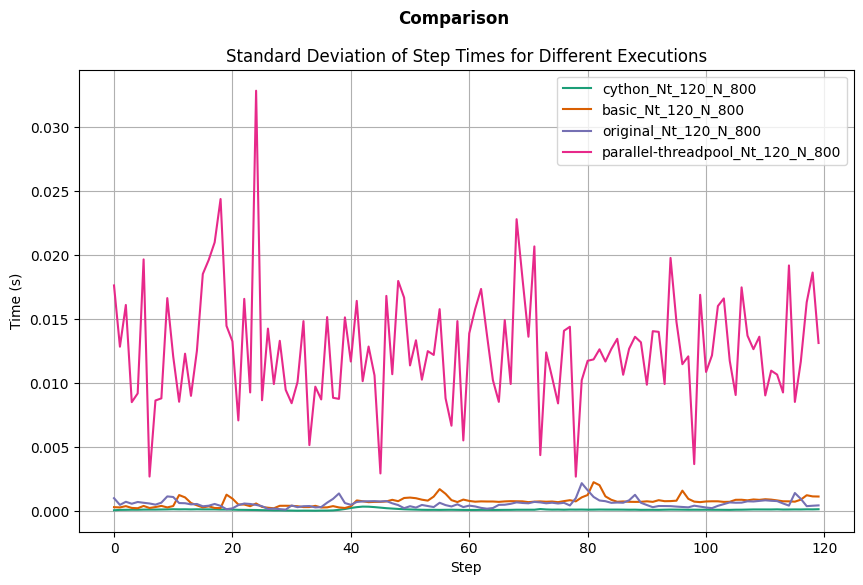

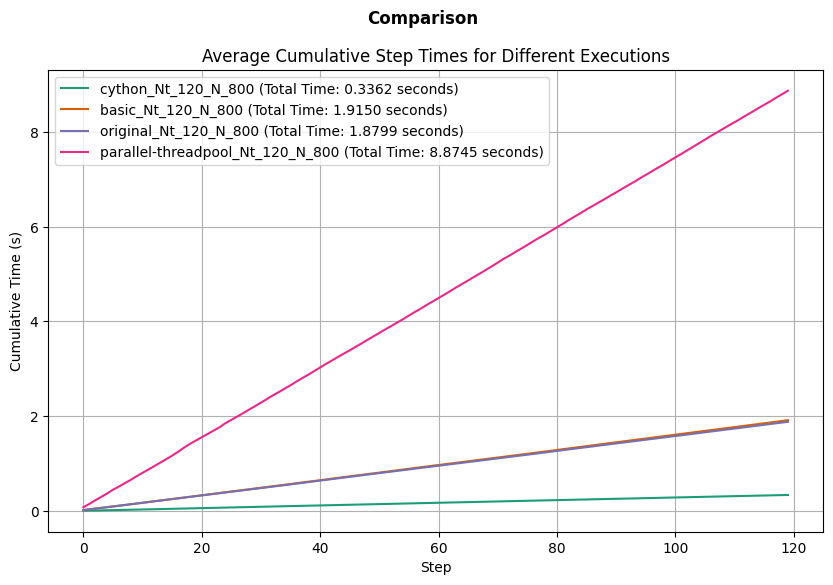

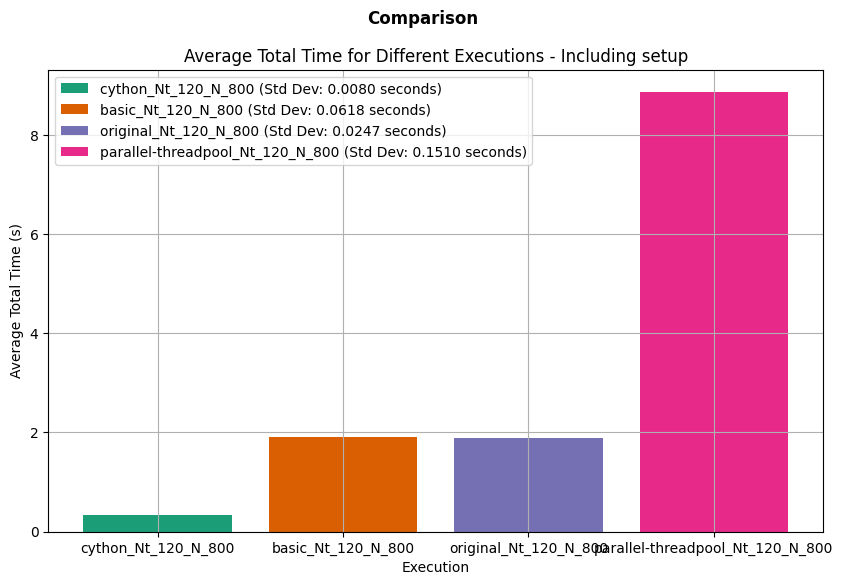

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

# Filter the DataFrame to include only the desired combinations
df_filtered = df[df.index.str.contains('basic_|original_|cython|parallel') & df.index.str.contains('Nt_120_N_800')]

extra_title = "Comparison"

plot_avg_step_times_per_execution(df_filtered, extra_title)
plot_std_step_times_per_execution(df_filtered, extra_title)
plot_avg_cumulative_step_times_per_execution(df_filtered, extra_title)
plot_avg_total_time_per_executions(df_filtered,  extra_title)

Here we can see how the threadpool implementation is not an improvement, probably due to the overhead of creating and managing threads. 

**Hoever the Cython implementation achieves important improvements in timing.**

> A combination of the two techniques has also been attempted, with suboptimal results.

,desc,avg_step_times,std_step_times,avg_total_time,std_dev_total_time
cython_Nt_30_N_100,Simulation using a Cython-compiled mean theta ...,"[9.87553e-05, 0.0001027715, 9.9845e-05, 0.0001...","[3.8342730901828054e-05, 3.8368414346308345e-0...",0.003432,0.000545
cython_Nt_30_N_200,Simulation using a Cython-compiled mean theta ...,"[0.0002108019, 0.00025584239999999997, 0.00025...","[9.879854077105592e-05, 0.00012810954541734977...",0.008039,0.003989
cython_Nt_30_N_400,Simulation using a Cython-compiled mean theta ...,"[0.0003981513, 0.0005492319, 0.0005640593, 0.0...","[6.44785051082917e-06, 1.674078374778194e-05, ...",0.018364,0.000266
cython_Nt_30_N_800,Simulation using a Cython-compiled mean theta ...,"[0.0015581309, 0.0023305894, 0.0024258111, 0.0...","[7.77592025363558e-05, 0.00011389020115198672,...",0.079211,0.004396
cython_Nt_60_N_100,Simulation using a Cython-compiled mean theta ...,"[5.8890199999999994e-05, 6.63492e-05, 6.20399e...","[3.6783227373355917e-06, 7.12450576250732e-06,...",0.004234,0.000124
...,...,...,...,...,...
parallel-threadpool_Nt_120_N_800,Simulation using a parallelized step function ...,"[0.0748648923, 0.0702404148, 0.0760593108, 0.0...","[0.017623588393158918, 0.012839069042570173, 0...",8.874503,0.150953
parallel-threadpool_Nt_240_N_100,Simulation using a parallelized step function ...,"[0.0040665504, 0.0040512131, 0.003944803, 0.00...","[0.00029936144382274743, 0.0002086286512046943...",1.005838,0.023952
parallel-threadpool_Nt_240_N_200,Simulation using a parallelized step function ...,"[0.0073689393, 0.0071936028, 0.0071444416, 0.0...","[0.0006281696575056854, 0.0006264598001953198,...",1.950153,0.055417
parallel-threadpool_Nt_240_N_400,Simulation using a parallelized step function ...,"[0.0159734827, 0.0203017143, 0.0159829391, 0.0...","[0.0015660637357805109, 0.009213781559159008, ...",4.587923,0.158003


In [19]:
df.to_csv("results.csv")